In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer #Tokenize words to numerical format
from tensorflow.keras.preprocessing.sequence import pad_sequences #Every word must have same length for matrix representation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [0]:
import numpy as np
import pandas as pd
from numpy import array
from sklearn.model_selection import train_test_split

# Exploratory Data Analysis

In [0]:
# Loading the Data

data = pd.read_csv('/content/drive/My Drive/fake.csv')
data.shape

(12999, 20)

In [0]:
data.head(5)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [0]:
data.tail(5)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
12994,f1b5d0e44803f48732bde854a9fdf95837219b12,2,replaceme,2016-10-26T23:58:00.000+03:00,NaN,It DOES allow you to put a dog face on top of ...,english,2016-10-27T00:37:46.194+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs
12995,36011ceba3647e1bea78299b68b6fb705a1fc1ad,3,Freedumb,2016-10-27T00:02:00.000+03:00,NaN,Wait till you see what happens to the valuatio...,english,2016-10-27T00:37:46.220+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs
12996,6995d1aa9ac99926106489b14b5530e85358059a,4,major major maj...,2016-10-27T00:06:00.000+03:00,NaN,I'm waiting for the one that puts a pussy on m...,english,2016-10-27T00:37:46.244+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs
12997,7de8ae90eee164eb756db6c8a3772288e11d7a94,5,beemasters,2016-10-27T00:09:00.000+03:00,NaN,$4 Billion even after they are known to be kee...,english,2016-10-27T00:37:46.247+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs
12998,dabef7095b7d9dae6eb0d83c4cbb40b85efd7ae5,6,i&#039;m-confused,2016-10-27T00:09:00.000+03:00,NaN,of course - how else would they disceminate te...,english,2016-10-27T00:37:46.260+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs


In [0]:
# Lets create y_label i.e Spam or not by Creating a Bias
# Any article with spam level >0.2 is marked as spam

y_data = []
for e in data['spam_score']:
  if e > 0.2:
    y_data.append(1)
  else:
    y_data.append(0)

In [0]:
len(y_data)

12999

In [0]:
count_0 = 0
count_1 = 0
for e in y_data:
  if(e == 1):
    count_1 = count_1 + 1
  else:
    count_0 = count_0 + 1

In [0]:
print(count_0)

12499


In [0]:
print(count_1)

500


In [0]:
# Clearly the Above analysis shows imbalanced dataset

In [0]:
# X_data is combination of text and title because content + title both can play a pivotal role in determining label

X_data = data['text'] + data['title']

In [0]:
X_data.shape

(12999,)

In [0]:
# How a sample X_data looks like

X_data[1000]

'Email \n\nThe excitement over the US election is culminating as the due date is getting closer. Each candidate is trying to use any device at hand to denigrate the other and morality is the last thing to strike the minds of the candidates. The fact of the matter is that morality is a dead circle in the American politics. Hillary Clinton, the democratic candidate, uses f-word in a debate ( http://en.institutomanquehue.org/publications/news/did-hillary-clinton-mutter-donald-trump-debate.html ) watched by hundreds of millions of people around the world and finds no shame in it. Even American religious leaders believe that Clinton is not competent to be the president of a religious country like United States ( http://en.institutomanquehue.org/publications/news/christian-right-leader-hillary-clinton-hostile-biblical-christianity.html ). On the other hand, the GOP candidate, Donald trump , has no better condition. His sexual harassments and violent ideas towards women were shocking not only

# Cleaning and Tokenizing X_data and y_data

In [0]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#Data Pre-Processing(Treating Symbols and Stopwords Present in Data) using nltk and re

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]') #These Symbols will be replaced with Space
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')         #These Symbols will be Removed from Text
STOPWORDS = set(stopwords.words('english')) 

In [0]:
#Text Cleaning Functions

def string_form(value):
    return str(value)

def clean_text(text):
   
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()  #LowerCase Text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) #Replace Certain Symbols by Space in Text
    text = BAD_SYMBOLS_RE.sub('', text) #Delete Certain Symbols from Text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) #Remove Stopwords from Text
    return text

In [0]:
# Text Pre-processing and cleaning operations

X_data = X_data.apply(string_form)
X_data = X_data.apply(clean_text)

In [0]:
# Let us Remove all nan values

X_data_final = []
y_data_final = []

for e in range(len(X_data)):
  if(X_data[e] != 'nan'):
    X_data_final.append(X_data[e])
    y_data_final.append(y_data[e])

In [0]:
len(X_data_final)

12273

In [0]:
len(y_data_final)

12273

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data_final)

In [0]:
# Let's see all the words tokenized

vocab = tokenizer.index_word
vocab

In [0]:
#We saw the tokenization of words
#Now we will get length of vocabulary then do embedding
vocab_size = len(tokenizer.word_index) + 1
vocab_size

171533

In [0]:
# We have a staggering 171533 distinct words after text cleaning

In [0]:
#We have 28711 unique words
encoded_text = tokenizer.texts_to_sequences(X_data_final)

In [0]:
#This is text data tokenized and as present in dataset, i.e as sentences
encoded_text[0]

[1230,
 415,
 51,
 97,
 1541,
 501,
 340,
 209,
 390,
 275,
 77,
 6432,
 16035,
 53,
 36,
 25,
 9643,
 61,
 69,
 156,
 4428,
 20,
 3317,
 156,
 30275,
 6086,
 396,
 135,
 20,
 1103,
 176,
 331,
 825,
 210,
 1384,
 798,
 10,
 5,
 574,
 1154,
 1104,
 2464,
 683,
 22313,
 82760,
 39,
 139,
 82761,
 7402,
 6086,
 397,
 3318,
 1103]

In [0]:
# There are 12273 samples

len(encoded_text)

12273

# Finding Average Length of an article

In [0]:
# We want to keep articles which have minimum 100 words and maximum 500 words to prevent under-fitting and over-fitting

min = 100
max = 500
count = 0
for e in encoded_text:
  if(len(e) > min and len(e) < max):
    count = count + 1
  
count

6896

In [0]:
#Max length of any text sequence in the dataset

max_length = 500
X = pad_sequences(encoded_text, maxlen = max_length, padding = 'post')

In [0]:
print(X)

[[  1230    415     51 ...      0      0      0]
 [   712    173   2946 ...      0      0      0]
 [   838     17    922 ...      0      0      0]
 ...
 [  2618      7   1323 ...    133    492   8767]
 [171521    896    687 ...      0      0      0]
 [   896    687     15 ...      0      0      0]]


In [0]:
# All the encoded articles are now of length 500 after padding

X.shape

(12273, 500)

In [0]:
# Now finally we have X as cleaned, tokenized and padded X_data and y_data_final as y_data

In [0]:
# Now that we have X_data and y_data we will split them

from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y_data_final, test_size = 0.2)

In [0]:
#Since the Dataset is Un-Balanced we need to apply Over-Sampling

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio = 1.0)
x_train_over, y_train_over = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
# Let us count classes in y_train_over

count1 = 0
count0 = 0
for e in y_train_over:
  if e == 1:
    count1 = count1 + 1
  elif e == 0:
    count0 = count0 + 1

In [0]:
# Now we can see that both classes are balanced

print(count0,count1)

9439 9439


In [0]:
y_train_over.shape

(18924,)

In [0]:
# now finally classes are balanced



# Using Self-Trained Vectors


In [0]:
self_vectors = dict()

In [0]:
file = open('/content/w2v_model.txt',encoding = 'utf-8')

for line in file:
  values = line.split()
  word = values[0]
  vectors = np.asarray(values[1:])
  self_vectors[word] = vectors
file.close()

In [0]:
#There are 158,120 words with their vectors here
len(self_vectors.keys())

158120

In [0]:
# Creating a word and corresponding vector matrix and finding out which words aren't present in the word-vector dictionary
word_vector_matrix = np.zeros((vocab_size, 100))
unavailable = 0

for word, index in tokenizer.word_index.items():
  vector = self_vectors.get(word)
  if vector is not None:
    word_vector_matrix[index] = vector
  else:
    unavailable = unavailable + 1
    print(word)

In [0]:
unavailable

38892

In [0]:
# Out of 171,533 words , 38,892 are unavailable because we had dropped all nan values

In [0]:
#Now we will search for vectors of words in our dataset and build model

In [0]:
X

array([[  1230,    415,     51, ...,      0,      0,      0],
       [   712,    173,   2946, ...,      0,      0,      0],
       [   838,     17,    922, ...,      0,      0,      0],
       ...,
       [  2618,      7,   1323, ...,    133,    492,   8767],
       [171521,    896,    687, ...,      0,      0,      0],
       [   896,    687,     15, ...,      0,      0,      0]], dtype=int32)

In [0]:
vec_size = 100
max_length = 500
#The  vectors are represented in 100 dimension

# Creating Attention Class

In [0]:
from keras.layers import Layer
import keras.backend as K

Using TensorFlow backend.


In [0]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

# Building Embedding + Attention + CNN Model

In [0]:
def axis(a):
  a = a[ :, :, newaxis]
  return a

In [0]:
from numpy import newaxis
from keras.layers import Lambda

In [0]:
import keras
sequence_input = keras.layers.Input(shape=(500,), dtype='int32')
x = keras.layers.Embedding(vocab_size, vec_size, input_length = max_length, weights = [word_vector_matrix], trainable = False)(sequence_input)

In [0]:
att_out=attention()(x)

In [0]:
x = Lambda(axis)(att_out)

In [0]:
y = keras.layers.Conv1D(96,(11),strides = 2,activation = 'relu',input_shape=(100,1))(x)
y = keras.layers.MaxPooling1D(3,2)(y)

y = keras.layers.Conv1D(256,5,padding = 'same',activation = 'relu')(y)
y = keras.layers.MaxPooling1D(3,2)(y)

y = keras.layers.Conv1D(384,3,padding='same',activation= 'relu')(y)
y = keras.layers.Conv1D(384,3,padding='same',activation= 'relu')(y)
y = keras.layers.Conv1D(256,3,padding='same',activation= 'relu')(y)
y = keras.layers.MaxPooling1D(3,2)(y)

y = keras.layers.Flatten()(y)
y = keras.layers.Dense(128, activation = 'relu')(y)
y = keras.layers.Dense(256, activation = 'relu')(y)
y = keras.layers.Dense(64, activation = 'relu')(y)

In [0]:
output=keras.layers.Dense(1,activation='sigmoid',trainable=True)(y)

In [0]:
model=keras.Model(inputs = sequence_input,outputs = output)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 500, 100)          17153300  
_________________________________________________________________
attention_5 (attention)      (None, 100)               600       
_________________________________________________________________
lambda_5 (Lambda)            (None, 100, 1)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 45, 96)            1152      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 22, 96)            0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 22, 256)           1231

In [0]:
# Adam Optimizer was used for Experiment
adam = keras.optimizers.Adadelta(learning_rate=0.0001, rho=0.95)

In [0]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
#Training the Model
epochs = 20
batch_size = 25

history = model.fit(x_train_over, y_train_over, epochs=epochs, batch_size=batch_size,validation_split = 0.1)

Train on 17031 samples, validate on 1893 samples
Epoch 1/20
17031/17031 [==============================] - 10s 595us/step - loss: 0.3115 - accuracy: 0.8561 - val_loss: 0.0712 - val_accuracy: 0.9567
Epoch 2/20
17031/17031 [==============================] - 9s 547us/step - loss: 0.1808 - accuracy: 0.9374 - val_loss: 0.0324 - val_accuracy: 0.9894
Epoch 3/20
17031/17031 [==============================] - 9s 544us/step - loss: 0.1519 - accuracy: 0.9492 - val_loss: 0.0966 - val_accuracy: 0.9461
Epoch 4/20
17031/17031 [==============================] - 9s 546us/step - loss: 0.1403 - accuracy: 0.9530 - val_loss: 0.1719 - val_accuracy: 0.9255
Epoch 5/20
17031/17031 [==============================] - 10s 558us/step - loss: 0.1381 - accuracy: 0.9553 - val_loss: 0.0463 - val_accuracy: 0.9778
Epoch 6/20
17031/17031 [==============================] - 10s 563us/step - loss: 0.1303 - accuracy: 0.9585 - val_loss: 0.0461 - val_accuracy: 0.9768
Epoch 7/20
17031/17031 [==============================] - 9s

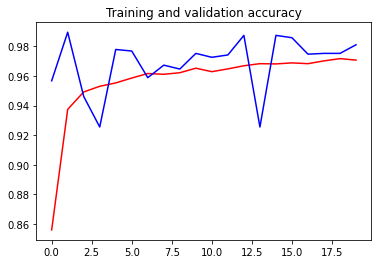

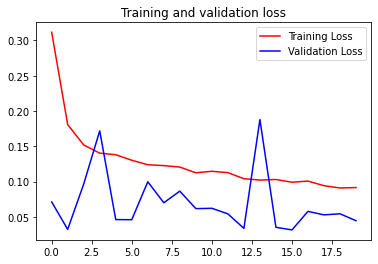

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred.shape

(2455, 1)

In [0]:
# Creating a bias for final prediction

y_predfinal = []
for e in y_pred:
  if e > 0.2:
    y_predfinal.append(1)
  else:
    y_predfinal.append(0)
  
y_predfinal = np.array(y_predfinal)
y_predfinal.shape

(2455,)

In [0]:
y_test = np.array(y_test)
y_test.shape

(2455,)

In [0]:
# Out of 2299 Non-Fake Articles 2228 were predicted Correctly
# Out of 156 Fake Articles 30 were predicted Correctly

from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_predfinal)

array([[2228,  126],
       [  71,   30]])

In [0]:
# Precision and Recall for Detecting Real News is High but for Detecting Fake news is Low

print(classification_report(y_test,y_predfinal))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2354
           1       0.19      0.30      0.23       101

    accuracy                           0.92      2455
   macro avg       0.58      0.62      0.60      2455
weighted avg       0.94      0.92      0.93      2455



In [0]:
# Saving Model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
